In [1]:
!pip install chardet
!pip install numpy

In [3]:
import numpy as np
import pandas as pd
import chardet

In [19]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2851,ham,how tall are you princess?,NaN,NaN,NaN
5061,ham,Havent stuck at orchard in my dad's car. Going...,NaN,NaN,NaN
573,ham,Waiting for your call.,NaN,NaN,NaN
1555,ham,Ok i found dis pierre cardin one which looks n...,NaN,NaN,NaN
2666,ham,"* Was a nice day and, impressively, i was sens...",NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

# Data Cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [24]:
df.sample(5)

,v1,v2
4329,ham,i thought we were doing a king of the hill thi...
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...
4681,ham,"Haha yeah, 2 oz is kind of a shitload"
1453,ham,Stupid.its not possible
4453,ham,I'm home. Ard wat time will u reach?


In [25]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [26]:
df.sample(5)

,target,text
100,ham,Okay name ur price as long as its legal! Wen c...
440,ham,Yes..he is really great..bhaji told kallis bes...
755,ham,So why didnt you holla?
1819,ham,Dunno dat's wat he told me. Ok lor...
2207,ham,Usually the body takes care of it buy making s...


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
df.duplicated().sum()

403

In [31]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

# Data Analysis

In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

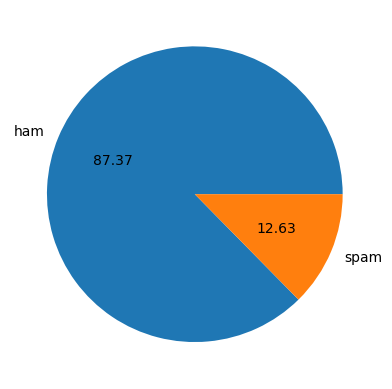

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mkd11\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

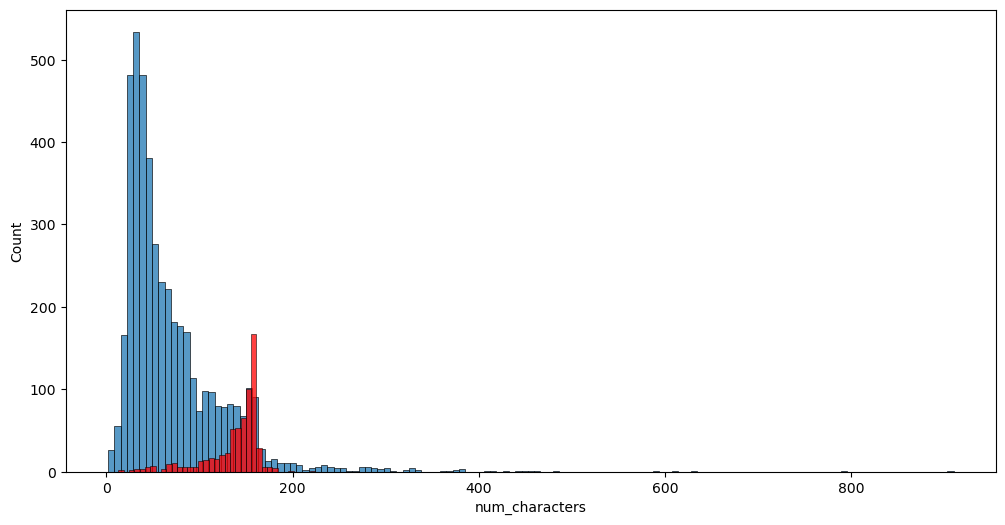

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

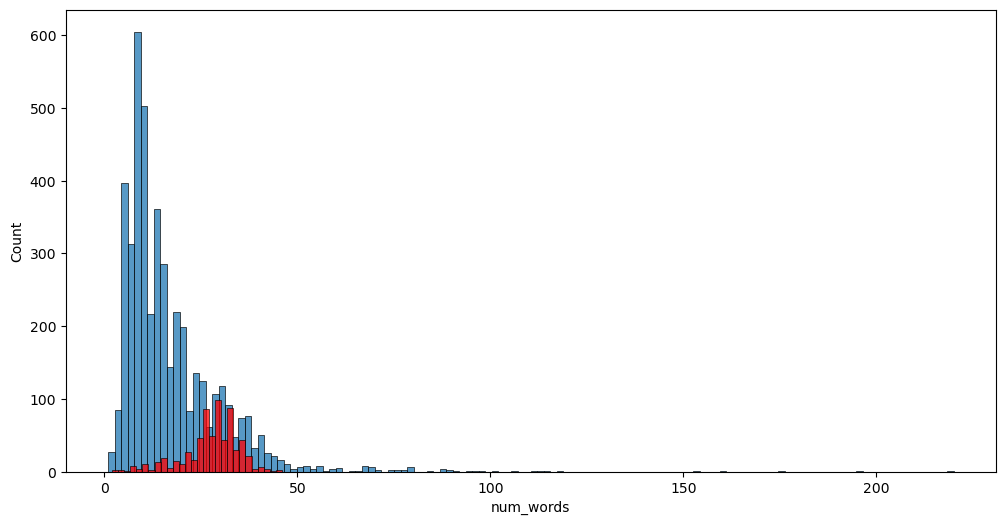

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\mkd11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


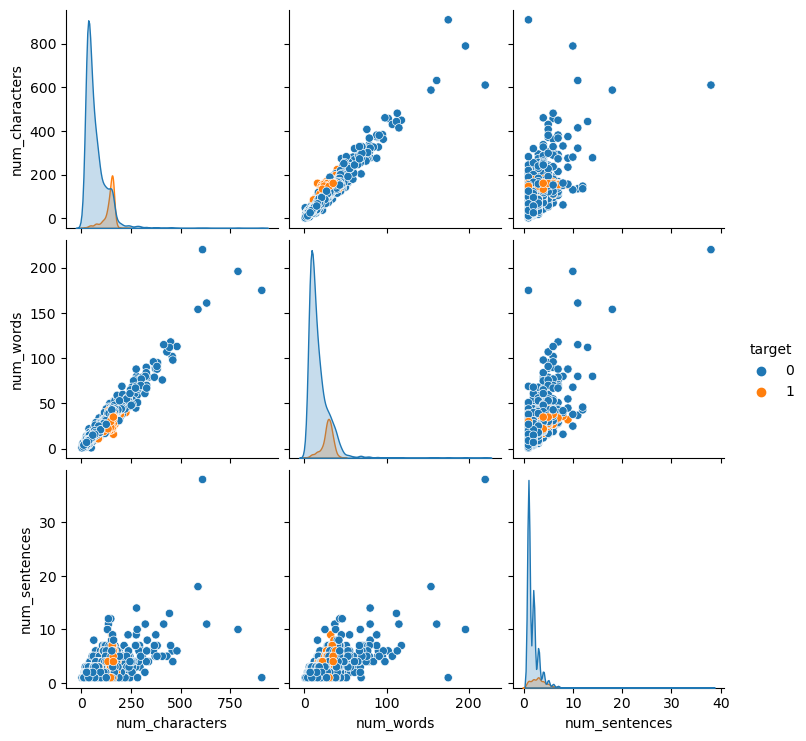

In [46]:
sns.pairplot(df,hue='target')

In [49]:
numeric_df = df.select_dtypes(include='number')

<Axes: >

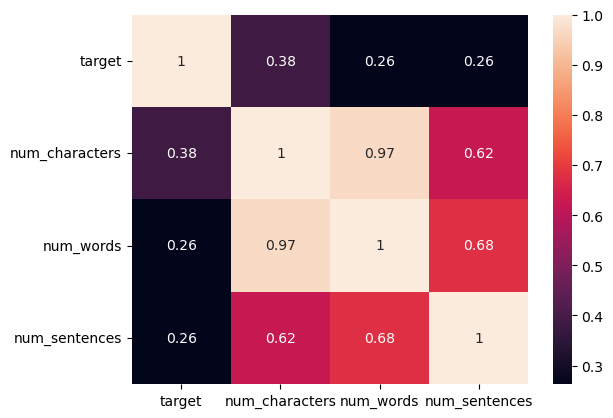

In [50]:
sns.heatmap(numeric_df.corr(),annot=True)

# Data Preprocessing

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('having')

'have'

In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkd11\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
import string

In [54]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [56]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/300.2 kB 2.3 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 561.9 kB/s eta 0:00:00


In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

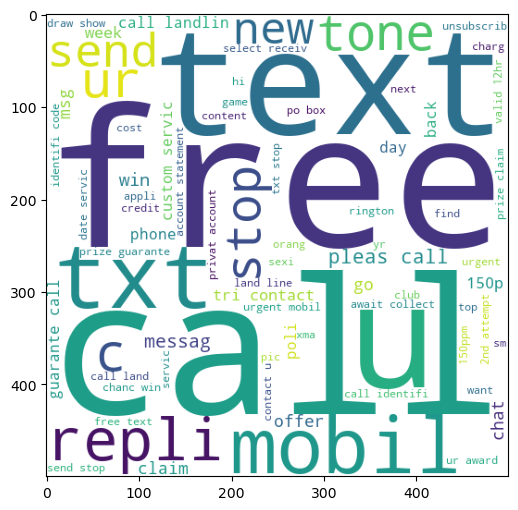

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

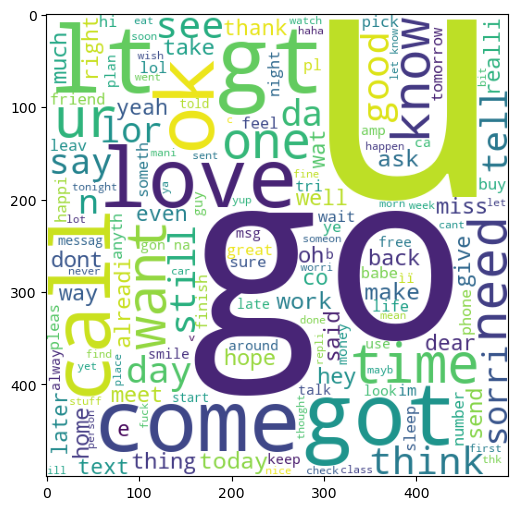

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

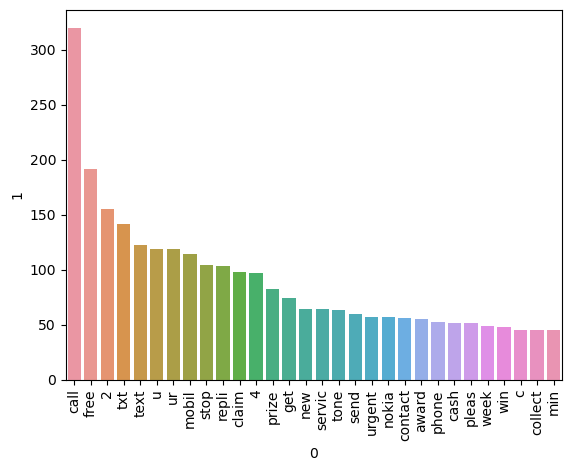

In [67]:
from collections import Counter
aa=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=aa[0],y=aa[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

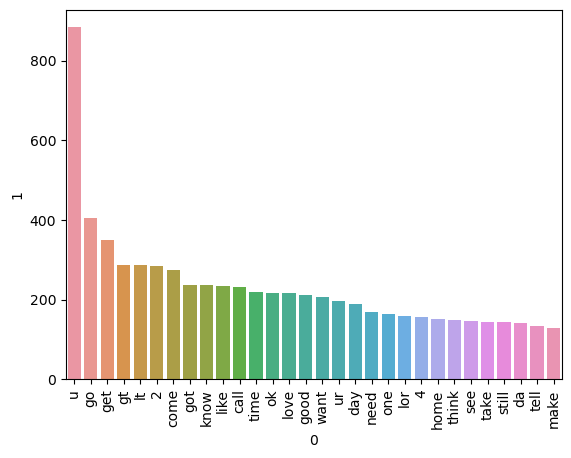

In [69]:
from collections import Counter
bb=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=bb[0],y=bb[1])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Build

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [73]:
y = df['target'].values

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [81]:
!pip install xgboost

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [86]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\mkd11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


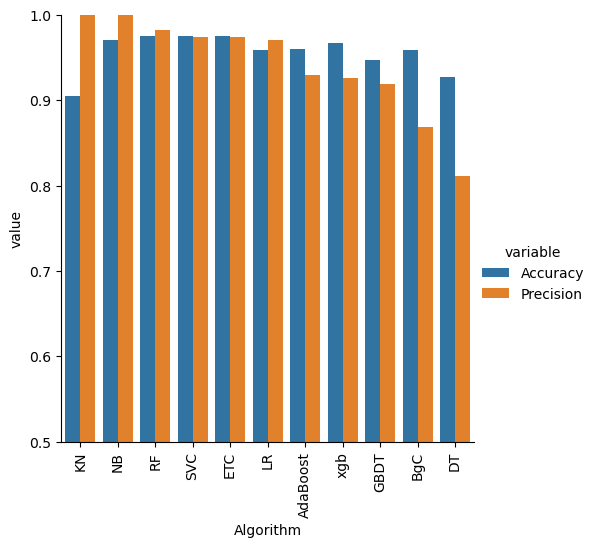

In [90]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [97]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [120]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [159]:
y_pred = clf.predict(X_train)

In [160]:
for value, val in zip(y_pred, X_train):
    print(value, val)

0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. 

0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0.       

0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0.         0.         0.         ... 0.         0.         0.32601174]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0.         0.         0.         ... 0.         0.         0.46563793]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
0 [0. 0. 0. ... 0. 0. 0.]
1 [0.         0.    